# 특성 스케일 바꾸기

In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [9]:
feature = np.array([[-500.5],
                    [-100.1],
                    [0],
                    [100.1],
                    [900.9]])

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(feature)
feature_scaled = scaler.transform(feature)
feature_scaled

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
feature_scaled = scaler.fit_transform(feature)
feature_scaled

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

In [16]:
scaler = MinMaxScaler().fit(feature[:3])
scaler.transform(feature[:3])

array([[0. ],
       [0.8],
       [1. ]])

In [17]:
scaler.transform(feature[3:])

array([[1.2],
       [2.8]])

# 특성을 표준화 하기

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [19]:
x = np.array([[-1000.1],
              [-200.2],
              [500.5],
              [600.6],
              [9000.9]])

In [20]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

In [22]:
x_scaled.mean(), x_scaled.std()

(4.4408920985006264e-17, 1.0)

In [23]:
from sklearn.preprocessing import RobustScaler

In [24]:
scaler = RobustScaler()
scaler.fit_transform(x)

array([[-1.87387612],
       [-0.875     ],
       [ 0.        ],
       [ 0.125     ],
       [10.61488511]])

In [28]:
iqr = x[3] - x[1]
(x-np.median(x))/iqr

array([[-1.87387612],
       [-0.875     ],
       [ 0.        ],
       [ 0.125     ],
       [10.61488511]])

In [29]:
from sklearn.preprocessing import QuantileTransformer

In [30]:
scaler = QuantileTransformer()
scaler.fit_transform(x)

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  warnings.warn(


array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

# 정규화 하기

In [32]:
import numpy as np
from sklearn.preprocessing import Normalizer

In [34]:
features = np.array([[0.5, 0.5],
                     [1.1, 3.4],
                     [1.5, 20.2],
                     [1.63, 34.4],
                     [10.9, 3.3]])

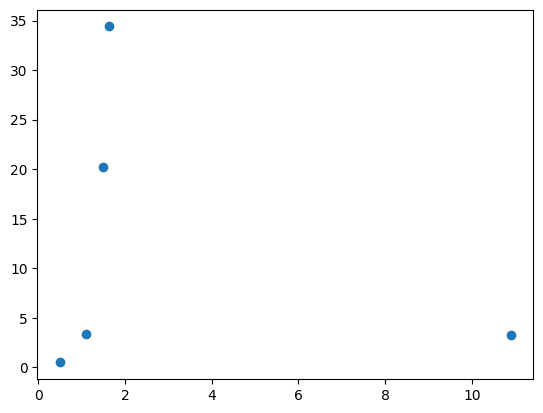

In [47]:
import matplotlib.pyplot as plt
plt.scatter(features[:,0], features[:,1])

In [49]:
features_l1 = Normalizer(norm='l1').transform(features)
features_l1

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

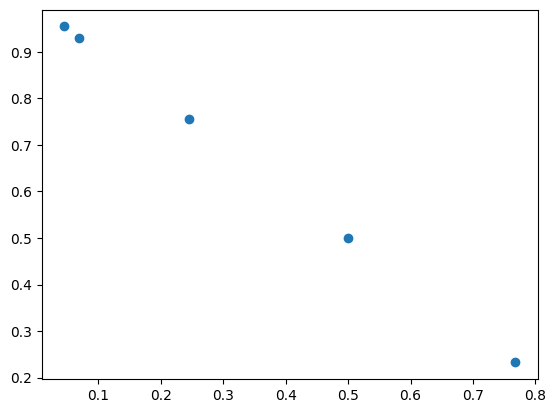

In [50]:
plt.scatter(features_l1[:,0], features_l1[:,1])

In [46]:
features_l2 = Normalizer(norm='l2').transform(features)
features_l2

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

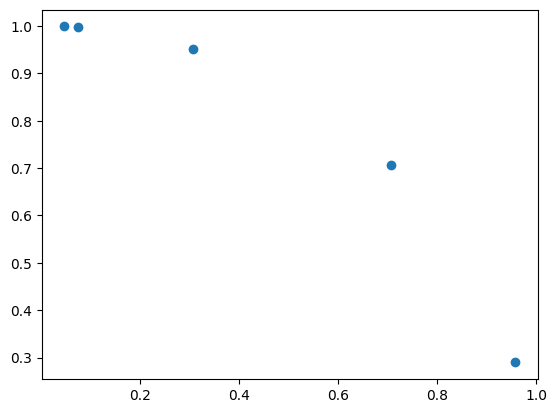

In [48]:
plt.scatter(features_l2[:,0], features_l2[:,1])

In [55]:
features/np.sum(np.abs(features), axis=1, keepdims=True)

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

In [56]:
features/np.sqrt(np.sum(np.square(features), axis=1, keepdims=True))

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

In [57]:
features_l_inf = Normalizer(norm='max').transform(features)
features_l_inf

array([[1.        , 1.        ],
       [0.32352941, 1.        ],
       [0.07425743, 1.        ],
       [0.04738372, 1.        ],
       [1.        , 0.30275229]])

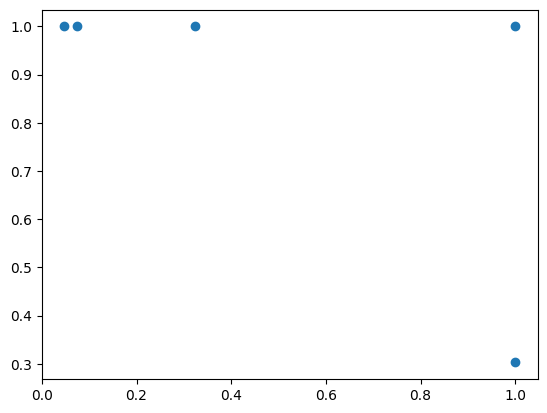

In [58]:
plt.scatter(features_l_inf[:,0], features_l_inf[:,1])

# 다항 특성과 교차항 특성 생성하기

In [59]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [60]:
features = np.array([[2, 3],
                     [2, 3],
                     [2, 3]])

In [61]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [62]:
poly.fit_transform(features)

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.]])

In [63]:
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [64]:
interaction.fit_transform(features)

array([[2., 3., 6.],
       [2., 3., 6.],
       [2., 3., 6.]])

In [65]:
poly_bias = PolynomialFeatures(degree=2, include_bias=True).fit(features)
poly_bias.transform(features)

array([[1., 2., 3., 4., 6., 9.],
       [1., 2., 3., 4., 6., 9.],
       [1., 2., 3., 4., 6., 9.]])

In [67]:
poly_bias.get_feature_names_out()

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

# 특성 변환하기

In [68]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

In [69]:
features = np.array([[2, 3],
                     [2, 3],
                     [2, 3]])

In [70]:
def add_ten(x):
    return x + 10

In [71]:
ten_transformer = FunctionTransformer(add_ten)

In [72]:
ten_transformer.transform(features)

array([[12, 13],
       [12, 13],
       [12, 13]])

In [74]:
import pandas as pd

In [76]:
df = pd.DataFrame(features, columns=['ftr1', 'ftr2'])
df

,ftr1,ftr2
0,2,3
1,2,3
2,2,3


In [77]:
df.apply(add_ten)

,ftr1,ftr2
0,12,13
1,12,13
2,12,13


In [81]:
# FunctionTransformer(add_ten, validate=True).transform(np.array([1,2,3]))

In [82]:
FunctionTransformer(add_ten, validate=False).transform(np.array([1,2,3]))

array([11, 12, 13])

# 이상치 감지하기

In [83]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

In [90]:
features, _ = make_blobs(n_samples=10, n_features=2, centers=1, random_state=1)

In [91]:
features[0, 0] = 1000;
features[0, 1] = 10000

In [92]:
outlier_detector = EllipticEnvelope(contamination=.1)

In [93]:
outlier_detector.fit(features)

EllipticEnvelope()

In [94]:
outlier_detector.predict(features)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [96]:
feature = features[:, 0]
feature

array([ 1.00000000e+03, -2.76017908e+00, -1.61734616e+00, -5.25790464e-01,
        8.52518583e-02, -7.94152277e-01, -1.34052081e+00, -1.98197711e+00,
       -2.18773166e+00, -1.97451969e-01])

In [97]:
def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    return np.where((x>upper_bound)|(x<lower_bound))

In [98]:
indicies_of_outliers(feature)

(array([0]),)

# 이상치 다루기

In [99]:
import pandas as pd

In [100]:
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

In [101]:
houses[houses['Bathrooms']<20]

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


In [102]:
houses['Outlier'] = np.where(houses['Bathrooms']<20,0, 1)

In [103]:
houses

,Price,Bathrooms,Square_Feet,Outlier
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


In [104]:
np.log(houses['Square_Feet'])

0     7.313220
1     7.824046
2     7.313220
3    10.778956
Name: Square_Feet, dtype: float64

In [105]:
[np.log(x) for x in houses['Square_Feet']]

[7.313220387090301, 7.824046010856292, 7.313220387090301, 10.778956289890028]

In [106]:
houses['Log_of_Square_Feet'] = [np.log(x) for x in houses['Square_Feet']]

In [107]:
houses

,Price,Bathrooms,Square_Feet,Outlier,Log_of_Square_Feet
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


# 특성 이산화하기

In [108]:
import numpy as np
from sklearn.preprocessing import Binarizer

In [109]:
age = np.array([[6],
                [12],
                [20],
                [36],
                [65]])

In [114]:
binarizer = Binarizer(threshold=18)

In [115]:
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [116]:
np.digitize(age, bins=[20, 30, 64])

array([[0],
       [0],
       [1],
       [2],
       [3]])

In [117]:
np.digitize(age, bins=[20, 30, 64], right=True)

array([[0],
       [0],
       [0],
       [2],
       [3]])

In [119]:
np.digitize(age, bins=[20])

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [120]:
np.digitize(age, bins=[20], right=True)

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [121]:
from sklearn.preprocessing import KBinsDiscretizer

In [122]:
kb = KBinsDiscretizer(4, encode='ordinal', strategy='quantile')

In [123]:
kb.fit_transform(age)

array([[0.],
       [1.],
       [2.],
       [3.],
       [3.]])

In [125]:
kb = KBinsDiscretizer(4, encode='onehot-dense', strategy='quantile')

In [127]:
kb.fit_transform(age)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [128]:
kb = KBinsDiscretizer(4, encode='ordinal', strategy='uniform')
kb.fit_transform(age)

array([[0.],
       [0.],
       [0.],
       [2.],
       [3.]])

In [130]:
kb = KBinsDiscretizer(4, encode='onehot-dense', strategy='uniform')
kb.fit_transform(age)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [131]:
kb.bin_edges_

array([array([ 6.  , 20.75, 35.5 , 50.25, 65.  ])], dtype=object)

# 군집으로 샘플을 그룹으로 묶기

In [133]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [134]:
features, _ = make_blobs(n_samples=50,
                        n_features=2,
                        centers=3,
                        random_state=1)

In [144]:
df = pd.DataFrame(features, columns=['ftr1', 'ftr2'])

In [145]:
clusterer = KMeans(3, random_state=0)
clusterer.fit(features)
df['group'] = clusterer.predict(features)

/home/restful3/anaconda3/envs/trading/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [146]:
df.head(3)

,ftr1,ftr2,group
0,-9.877554,-3.336145,0
1,-7.287210,-8.353986,2
2,-6.943061,-7.023744,2


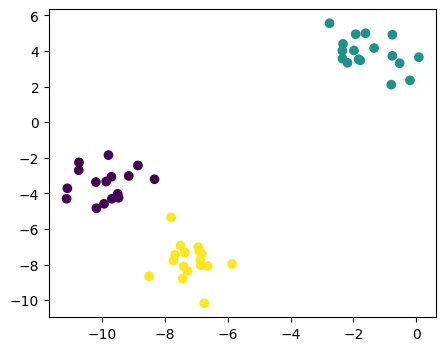

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.scatter(df['ftr1'], df['ftr2'], c=df['group']);

# 누락된 값을 가진 샘플을 삭제 하기

In [151]:
import numpy as np

features = np.array([[1.1, 11.1],
                     [2.2, 22.2],
                     [3.3, 33.3],
                     [4.4, 44.4],
                     [np.nan, 55]])

In [152]:
features[~np.isnan(features).any(axis=1)]

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4]])

In [153]:
df = pd.DataFrame(features, columns=['ftr1', 'ftr2'])

In [154]:
df.dropna()

,ftr1,ftr2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4


# 누락된 값 채우기

In [207]:
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [213]:
features, _ = make_blobs(n_samples=1000, 
                        n_features=2,
                        random_state=1)

In [214]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [215]:
true_value = features_scaled[0, 0].copy()
features_scaled[0, 0] = np.nan

In [216]:
imputer = KNNImputer(n_neighbors=5)
feature_knn_imputed = imputer.fit_transform(features_scaled)

In [217]:
print('실제 값 : ', true_value)
print('대체된 값 : ', feature_knn_imputed[0, 0])

실제 값 :  0.8730186113995938
대체된 값 :  1.0959262913919632


In [218]:
from sklearn.impute import SimpleImputer

In [219]:
imputer = SimpleImputer()
feature_simple_imputed = imputer.fit_transform(features_scaled)

In [220]:
print('실제 값 : ', true_value)
print('대체된 값 : ', feature_simple_imputed[0, 0])

실제 값 :  0.8730186113995938
대체된 값 :  -0.000873892503901796
